<a href="https://colab.research.google.com/github/NabillahAnnisa/NabillahAnnisa/blob/Fetal_CTG/fetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data and Library

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
!gdown --id 16ljJojmUycrqwNwtHQpXGQrdFidybgW8 -O fetal_health.csv

Downloading...
From: https://drive.google.com/uc?id=16ljJojmUycrqwNwtHQpXGQrdFidybgW8
To: /content/fetal_health.csv
100% 229k/229k [00:00<00:00, 63.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import class_weight

# classification library
# Machine Learning
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # SVM
# for ensambling ML model
from mlxtend.classifier import EnsembleVoteClassifier

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D # LSTM
from keras.utils.vis_utils import plot_model # visualize model
from keras.wrappers.scikit_learn import KerasClassifier # for wrapping deep learning model
from keras.callbacks import EarlyStopping

# matrix evaluation
from sklearn.metrics import roc_auc_score , make_scorer , accuracy_score , precision_score , recall_score , f1_score, confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
df2 = pd.read_csv('fetal_health.csv')

# Data Exploration

In [ ]:
print(df2.head(10))

   baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0
5           134.0          0.001  ...                 0.0           3.0
6           134.0          0.001  ...                 0.0           3.0
7           122.0          0.000  ...                 1.0           3.0
8           122.0          0.000  ...                 1.0           3.0
9           122.0          0.000  ...                 1.0           3.0

[10 rows x 22 columns]


Checking missing value di setiap kolom

AxesSubplot(0.125,0.125;0.775x0.755)


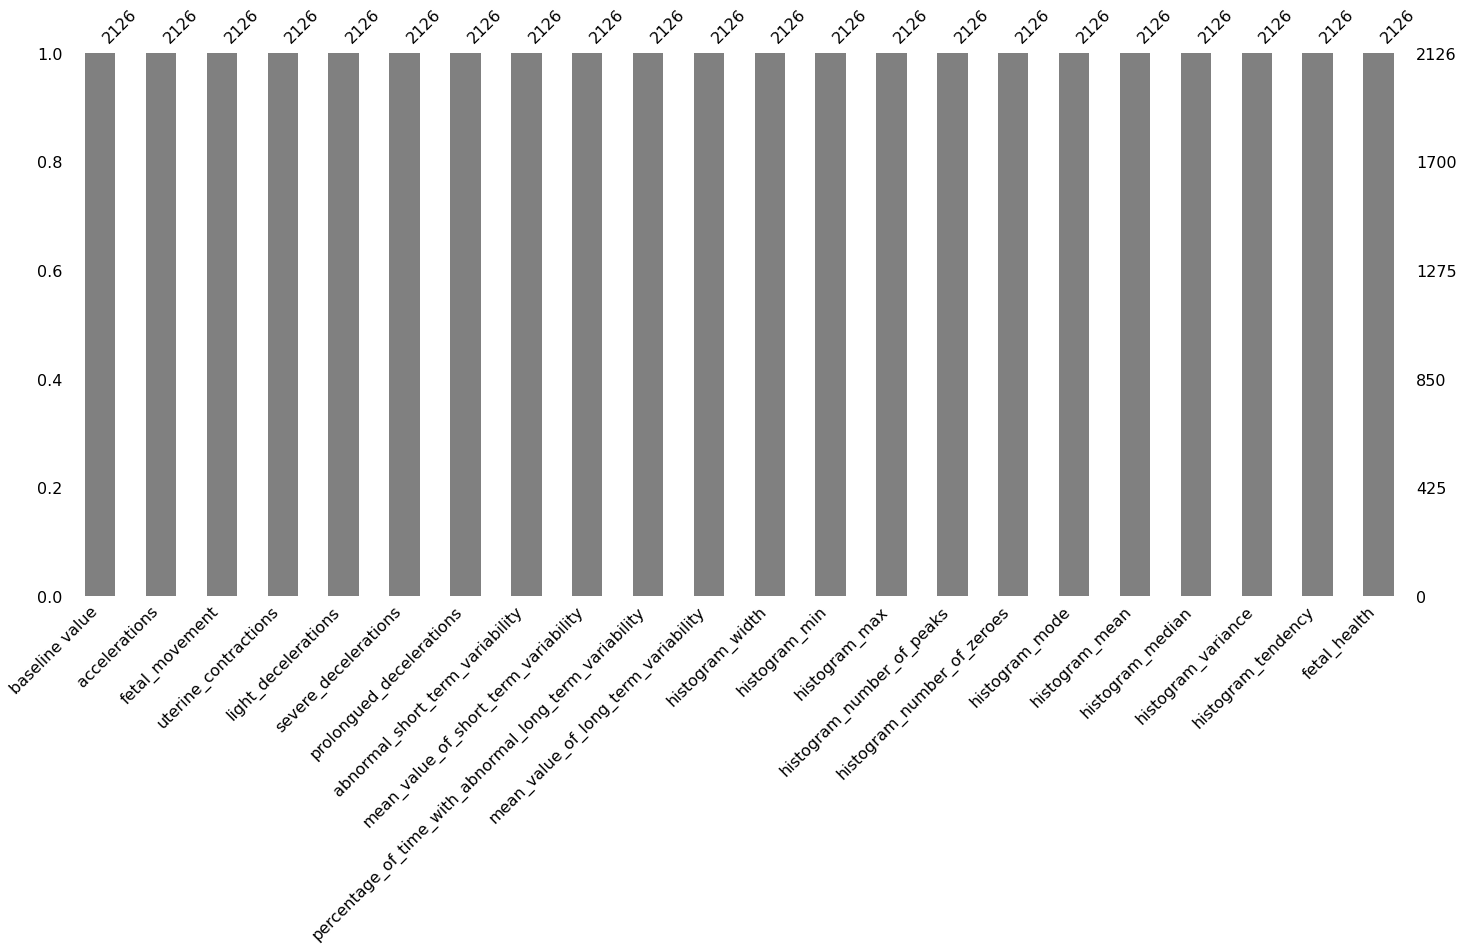

In [ ]:
import missingno as msno
n = msno.bar(df2,color="gray")
print(n)

Deskripsi Data

In [ ]:
df2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Distribusi Target Class: Sangat tidak seimbang 

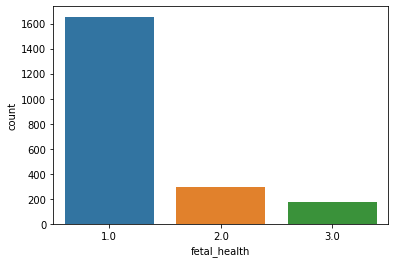

In [ ]:
sns.countplot(x="fetal_health",data = df2)
plt.show()

Memeriksa Outliers dalam data

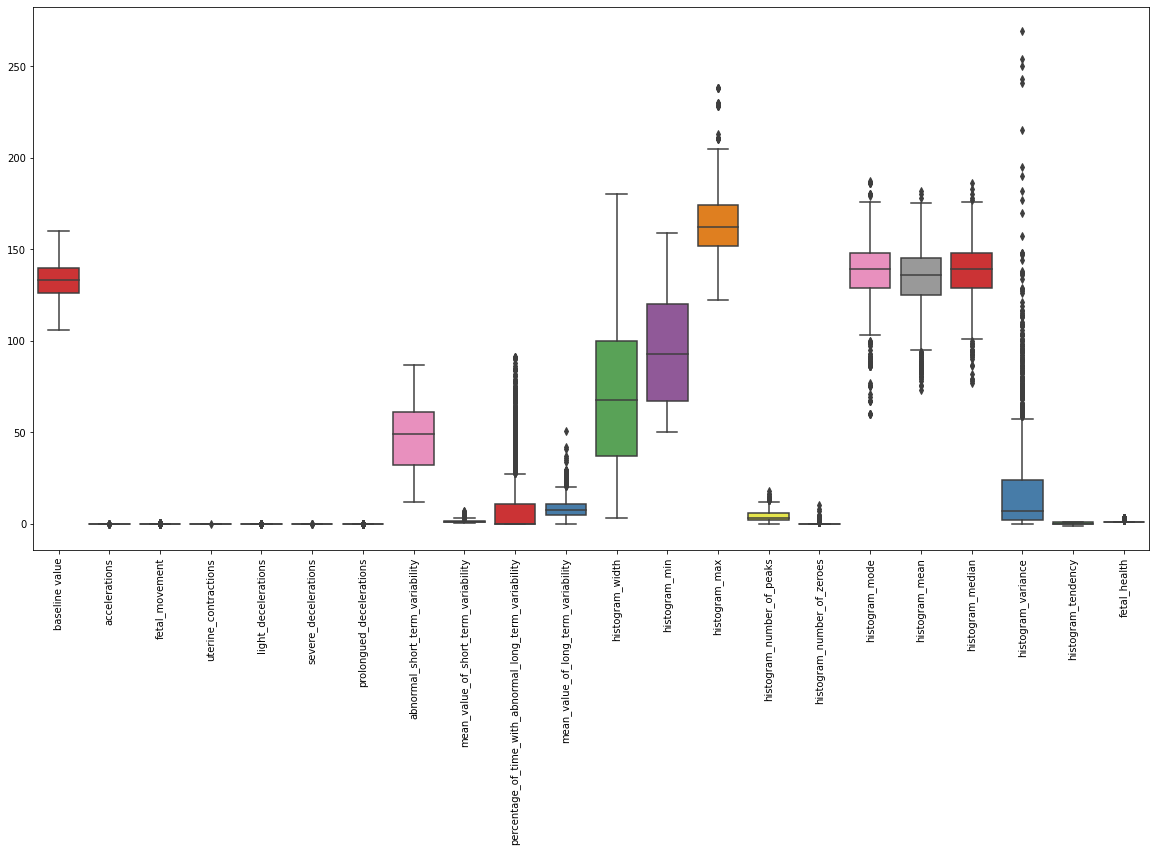

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df2,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

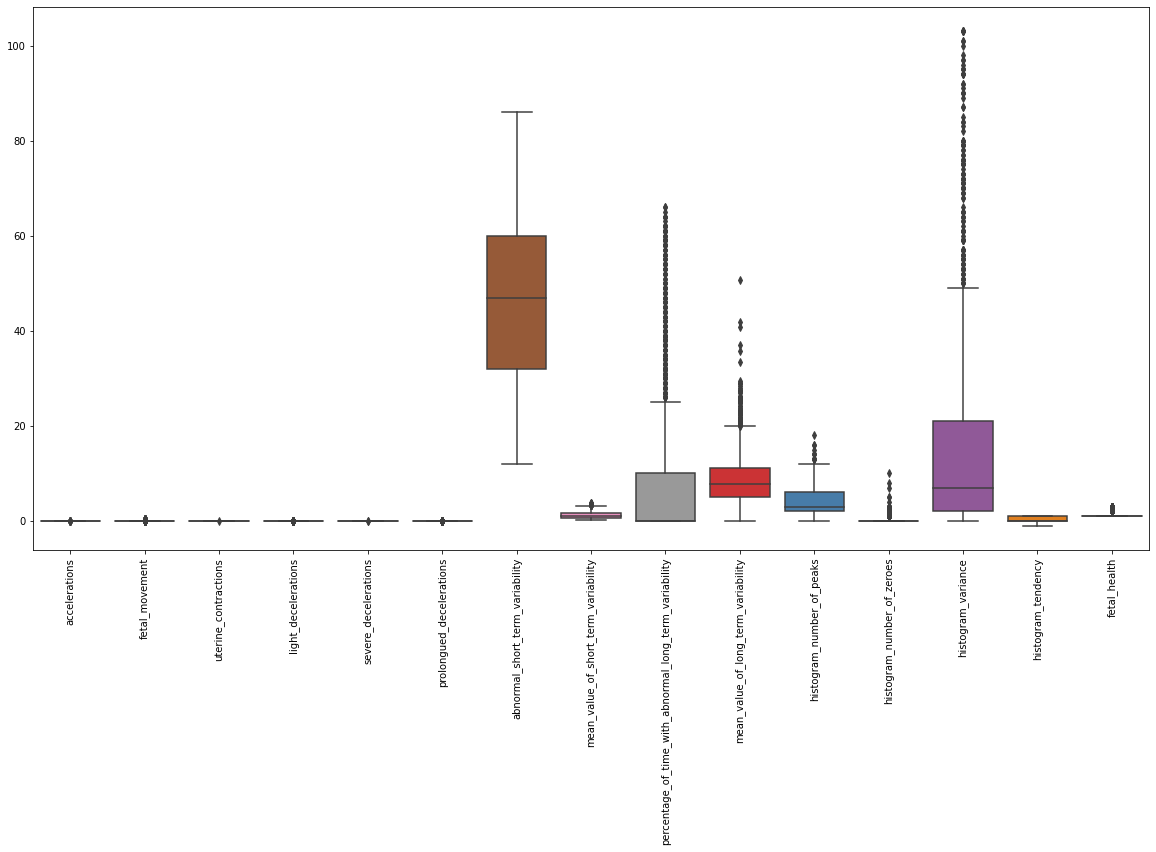

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df_fetal, palette = "Set1")
plt.xticks(rotation=90)
plt.show()

Menghilangkan outliers dengan menetapkan ambang bawah dan atas

In [ ]:
# Function to set upper and lower bound to 3rd standard deviation and remove outliers

def removeOutlier(att, df2):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df2[(att > lowerbound) & (att < upperbound)]

    print((df2.shape[0] - df1.shape[0]), ' number of outliers from ', df2.shape[0] )
    print(' ******************************************************')
    
    df2 = df1.copy()

    return df2

Menghapus outliers dari kolom yang menunjukkan outliers di plot kotak yang divisualisasikan di atas

In [ ]:
df2 = removeOutlier(df2.histogram_variance, df2)
df2 = removeOutlier(df2.histogram_median, df2)
df2 = removeOutlier(df2.histogram_mean, df2)
df2 = removeOutlier(df2.histogram_mode, df2)
df2 = removeOutlier(df2.percentage_of_time_with_abnormal_long_term_variability, df2)
df2 = removeOutlier(df2.mean_value_of_short_term_variability, df2)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 ******************************************************
lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 ******************************************************
lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 ******************************************************
lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************
lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 ******************************************************
lowerbound:  -1.1711686306789288  -------- upperbound:  3.781908245673867
30  number of outliers from  1974
 ******************************************************


In [ ]:
df2.shape # dari yg awalnya 2126 baris -> 1944

(1944, 22)

Corellation Heatmap

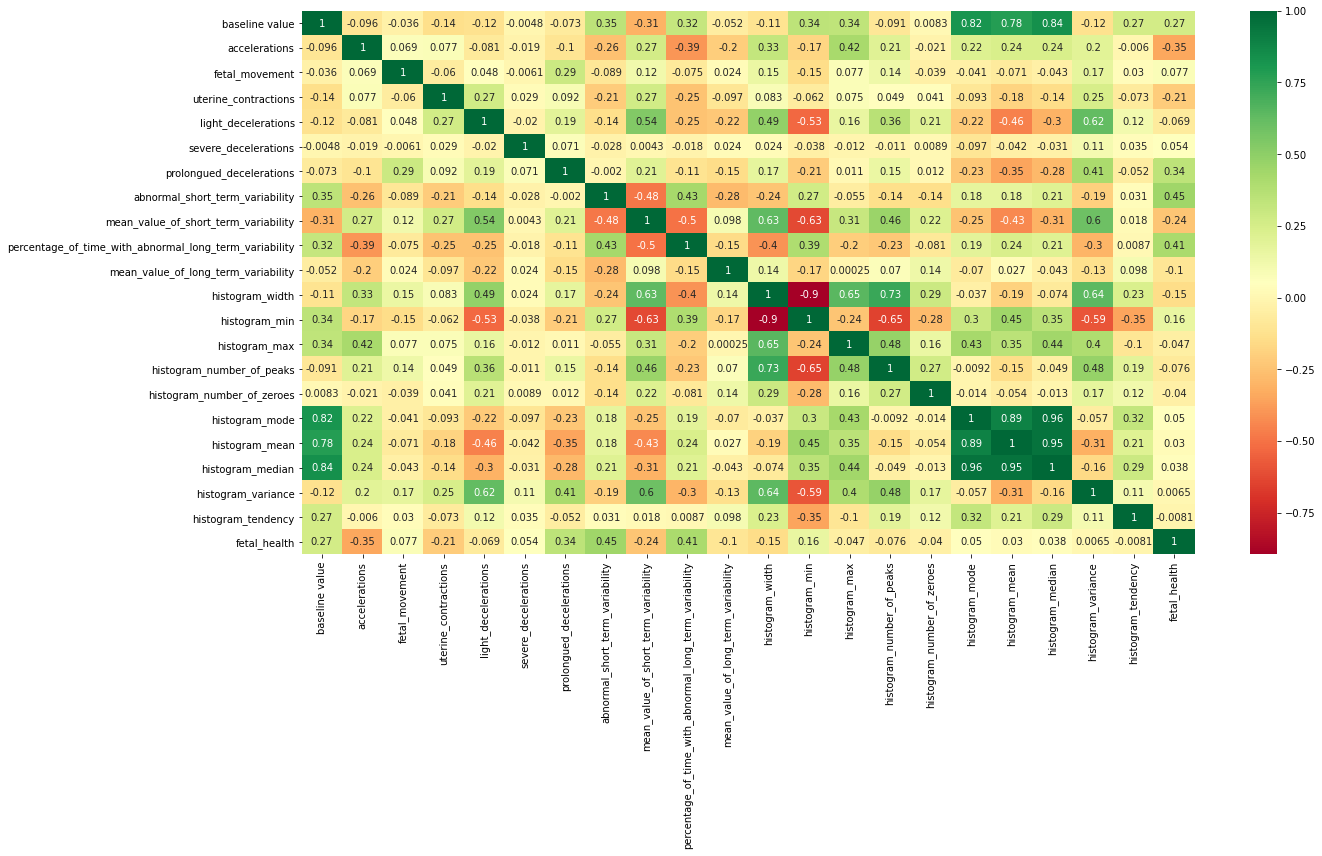

In [ ]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df2[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

# Fixing Multicollinearity

In [ ]:
df_vif = df2.copy().drop("fetal_health", axis = 1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#nilai correlation >10 maka dia termasuk multicollinearity harus di hilangkan atau digabung tapi pada kasus ini dihilangkan
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [ ]:
#secara otomatis ReduceVIF drop kolom yang memiliki nilai correlation >10
Mult_Coll = ReduceVIF()
df4 = Mult_Coll.fit_transform(df_vif)
df4.head()

ReduceVIF fit
ReduceVIF transform
Dropping histogram_width with vif=inf


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping histogram_median with vif=2429.7428187247033
Dropping histogram_mean with vif=1150.248307253575
Dropping baseline value with vif=576.7003914154217
Dropping histogram_mode with vif=229.32054814995607
Dropping histogram_max with vif=93.14442882369833
Dropping histogram_min with vif=13.225418492382076


,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_variance,histogram_tendency
0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0,0.0,73.0,1.0
1,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,6.0,1.0,12.0,0.0
2,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,5.0,1.0,13.0,0.0
3,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,11.0,0.0,13.0,1.0
4,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,9.0,0.0,11.0,1.0


In [ ]:
df_fetal = df2.copy().drop(columns = ["histogram_width","histogram_median","histogram_mean", "baseline value", "histogram_mode","histogram_max","histogram_min"], axis = 1)

#Balancing Dataset

In [ ]:
df_fetal.fetal_health.value_counts()

1.0    1601
2.0     283
3.0      60
Name: fetal_health, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df3_1 = df_fetal[df_fetal.fetal_health==1]
df3_2 = df_fetal[df_fetal.fetal_health==2]
df3_3 = df_fetal[df_fetal.fetal_health==3]
 
# Upsample minority class
df3_2_upsampled = resample(df3_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df3_3_upsampled = resample(df3_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df3_upsampled = pd.concat([df3_1, df3_2_upsampled, df3_3_upsampled])
 
# Display new class counts
df3_upsampled.fetal_health.value_counts()

3.0    1601
2.0    1601
1.0    1601
Name: fetal_health, dtype: int64

# Build Model

In [ ]:
# encoding target class into 0, 1, and 2
label = LabelEncoder()
label.fit(df_fetal['fetal_health'])
df_fetal['fetal_health_encode'] = label.transform(df_fetal['fetal_health'])

Memisahkan data test dan train

In [ ]:
# normal data
#x = df2.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
#y = df2['fetal_health_encode'] 

# upsampled data
x_upsampled = df3_upsampled.drop('fetal_health', axis = 1)
y_upsampled = df3_upsampled['fetal_health']

# split data into training : testing
x_train, x_test, y_train, y_test = train_test_split(x_upsampled,y_upsampled,test_size = 0.25, random_state = 0)

#data_train = pd.concat((x_train, y_train), axis = 1)
#data_test = pd.concat((x_test, y_test), axis = 1)

Feature Scaling: Standarisasi

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Deep Learning - ANN

In [ ]:
# encoding target class into 0, 1, and 2
label = LabelEncoder()
label.fit(df3_upsampled['fetal_health'])
df3_upsampled['fetal_health_encode'] = label.transform(df3_upsampled['fetal_health'])

# upsampled data
x_upsampled = df3_upsampled.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y_upsampled = df3_upsampled['fetal_health_encode']

# split data into training : testing
x_train, x_test, y_train, y_test = train_test_split(x_upsampled,y_upsampled,test_size = 0.25, random_state = 0)

data_train = pd.concat((x_train, y_train), axis = 1)
data_test = pd.concat((x_test, y_test), axis = 1)

In [ ]:
# define parameter
n_hiddenlayer = x_train.shape[1] * 1
activation = 'relu'
optimizer = 'adam'
n_outputlayer = 1
n_epoch = 100
n_batchsize = 16

# determine the number of input features
n_features = x_train.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(Dense(n_hiddenlayer, activation= activation, input_shape=(n_features,)))
# Adding the output layer
model.add(Dense(1))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 10)

In [ ]:
# calculate class weight (Estimate class weights for unbalanced datasets)
class_weight_list = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weight_list

# class weights as dictionary for keras
keys = [0,1,2]
classweight_dict = dict(zip(keys, class_weight_list.T))
classweight_dict

{0: 0.4047470331043098, 1: 2.2897526501766783, 2: 10.8}

In [ ]:
# fit into data training
history = model.fit(
    x_train, y_train, 
    epochs= n_epoch, 
    batch_size= n_batchsize,
    # class_weight = classweight_dict, 
    verbose= 1,
    validation_data=(x_test,y_test),
    callbacks = [callback_model]
  )

Epoch 1/100
226/226 [==============================] - 1s 2ms/step - loss: 1.2204e-07 - accuracy: 0.1713 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 1.1897e-07 - accuracy: 0.1750 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 1.1988e-07 - accuracy: 0.1652 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 1.2041e-07 - accuracy: 0.1670 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 1.1787e-07 - accuracy: 0.1705 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 1.1795e-07 - accuracy: 0.1652 - val_loss: 1.1653e-07 - val_accuracy: 0.1715
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 1.1981e-07 - accura

In [ ]:
def summarize_diagnostics(history, is_accuracy_only = False):
  if is_accuracy_only == False:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
  else:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.show()

In [ ]:
summarize_diagnostics(history, False)

In [ ]:
# evaluate predictions
model_pred = model.predict_classes(x_test)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(model_pred)

accuracy_result = accuracy_score(y_test, model_pred) * 100
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 2)

print('Model Accuracy of ANN is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of ANN is 17.152373022481264 % 
with ROC-AUC : 0.38

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.13      0.14      0.13       414
     Suspect       0.19      0.38      0.26       400
Pathological       0.00      0.00      0.00       387

    accuracy                           0.17      1201
   macro avg       0.11      0.17      0.13      1201
weighted avg       0.11      0.17      0.13      1201



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# evaluate predictions
model_pred = model.predict_classes(x_test)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(model_pred)

accuracy_result = accuracy_score(y_test, model_pred) * 100
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 2)

print('Model Accuracy of ANN is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of LSTM is 75.51440329218107 % 
with ROC-AUC : 0.48

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.80      0.93      0.86       396
     Suspect       0.00      0.00      0.00        72
Pathological       0.00      0.00      0.00        18

    accuracy                           0.76       486
   macro avg       0.27      0.31      0.29       486
weighted avg       0.65      0.76      0.70       486



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deep Learning - ANN [2]

In [ ]:
# define x and y
x = df2.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y = df2['fetal_health_encode']

# feature scaling on feature set
scaler = StandardScaler()
X = scaler.fit_transform(x)

# convert integers to dummy variables (i.e. one hot encoded) -> [0,1,0] / [0,1,1] / dll
y_hot_encoded = np_utils.to_categorical(df2['fetal_health_encode'])

In [ ]:
# split data into training : testing
x_train, x_test, y_train_hot_encode, y_test_hot_encode = train_test_split(X,y_hot_encoded,test_size = 0.25, random_state = 0)

In [ ]:
# define parameter
n_hiddenlayer = X.shape[1] * 2
activation = 'relu'
optimizer = 'adam'
n_outputlayer = y_hot_encoded.shape[1]
n_epoch = 100
n_batchsize = 16

# determine the number of input features
n_features = X.shape[1]

In [ ]:
def build_lstm_model():
  # define model
  model = Sequential()
  # model.add(Dense(n_hiddenlayer, activation= activation, input_shape=(n_features,)))
  model.add(Dense(n_hiddenlayer, activation= activation, input_dim = n_features))
  # Adding the output layer
  model.add(Dense(n_outputlayer))
  # compile the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# define model
lstm_model = KerasClassifier(build_fn=build_lstm_model, epochs= n_epoch, batch_size= n_batchsize, verbose=0)

# define k-fold
kfold = KFold(n_splits= 5, shuffle= True)

# build model
results = cross_val_score(lstm_model, X, y_hot_encoded, cv=kfold)
print('Model Accuracy of LSTM (5-fold Cross Validation): %.2f %%' % results.mean())

Model Accuracy of LSTM (5-fold Cross Validation): 0.43 %


## Deep Learning - LSTM

### Normal Data

In [ ]:
# encoding target class into 0, 1, and 2
label_exp22 = LabelEncoder()
# label.fit(df_fetal_upsampled['fetal_health'])
df2_without_outlier['fetal_health_encode'] = label_exp22.fit_transform(df2_without_outlier['fetal_health'])

In [ ]:
# for experiments 2.2
x_exp22 = df2_without_outlier.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y_exp22 = df2_without_outlier['fetal_health_encode'] 
x_train_exp22, x_test_exp22, y_train_exp22, y_test_exp22 = train_test_split(x_exp22, y_exp22, test_size = 0.25, random_state = 0)

data_train_exp22 = pd.concat((x_train_exp22, y_train_exp22), axis = 1)
data_test_exp22 = pd.concat((x_test_exp22, y_test_exp22), axis = 1)

In [ ]:
def prepareTimelags(data_input, data_output, n_timestep):
  # we need:
  # - what is the input?
  # - what is the output?
  # - how many training size?
  # - how many timestep?

  input, output = [] , []
  
  for i in range(n_timestep, len(data_input)):
      input.append(data_input[(i-n_timestep):i, : ])
      output.append(np.array(data_output)[i])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

In [ ]:
scaler_exp22 = StandardScaler()

x_train_exp22_scaled = scaler_exp22.fit_transform(x_train_exp22)
x_test_exp22_scaled = scaler_exp22.transform(x_test_exp22)

In [ ]:
# define inputs for data training
n_features_exp22 = len(x_exp22.columns)

# creating time lags (in case: using data 7 days before to predict case on 7th days)
n_timestep = 300
train_input_exp22, train_output_exp22 = prepareTimelags(data_input= x_train_exp22_scaled, data_output = y_train_exp22, n_timestep= n_timestep)

# reshape into [ samples, timestep, how many features to predict]
train_input_exp22 = train_input_exp22.reshape((train_input_exp22.shape[0], train_input_exp22.shape[1], n_features_exp22))

In [ ]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
train_output_exp22 = np_utils.to_categorical(train_output_exp22)

In [ ]:
label = LabelEncoder()
label.fit(df2['fetal_health'])
df2['fetal_health_encode'] = label.transform(df2['fetal_health'])

In [ ]:
x = df2.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y = df2['fetal_health_encode'] 

# split data into training : testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

data_train = pd.concat((x_train, y_train), axis = 1)
data_test = pd.concat((x_test, y_test), axis = 1)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
# calculate class weight (Estimate class weights for unbalanced datasets)
class_weight_list = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

# class weights as dictionary for keras
keys = np.unique(y_train).tolist()
classweight_dict = dict(zip(keys, class_weight_list.T))

print('Class weights for each target class is {0}'.format(classweight_dict))

Class weights for each target class is {0: 0.42677376171352077, 1: 2.382660687593423, 2: 4.216931216931217}


In [ ]:
def prepareTimelags(data_input, data_output, n_timestep):
  # we need:
  # - what is the input?
  # - what is the output?
  # - how many training size?
  # - how many timestep?

  input, output = [] , []
  
  for i in range(n_timestep, len(data_input)):
      input.append(data_input[(i-n_timestep):i, : ])
      output.append(np.array(data_output)[i])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

In [ ]:
# define inputs for data training
n_features = len(x_train.columns)

# creating time lags (in case: using data 7 days before to predict case on 7th days)
n_timestep = 300
train_input, train_output = prepareTimelags(data_input= x_train_scaled, data_output = y_train, n_timestep= n_timestep)

# reshape into [ samples, timestep, how many features to predict]
train_input = train_input.reshape((train_input.shape[0], train_input.shape[1], n_features))

In [ ]:
# check the time lags - gausah dicek kan ya ehehe
for i in range(len(train_input)):
  print(train_input[i], train_output[i])

In [ ]:
# define inputs for data testing
dataset_total = pd.concat((x_train_exp22, x_test_exp22), axis = 0)
dataset_test_input = dataset_total[len(dataset_total) - len(data_test_exp22) - n_timestep:].values
dataset_test_input = dataset_test_input.reshape(-1, 21) #Jadiin Matriks, Sebelumnya Vektor
dataset_test_input = scaler_exp22.transform(dataset_test_input)

test_input = []
for i in range(n_timestep, len(dataset_test_input)):
    test_input.append(dataset_test_input[i-n_timestep:i, : ])
test_input = np.array(test_input)
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 21))
# test_output_exp22 = np_utils.to_categorical(train_output_exp22)

In [ ]:
est: 45.798 % using {'activation': 'relu', 'batch_size': 64, 'neurons': 63, 'optimizer': 'adam'}

In [ ]:
# define parameter
n_hiddenlayer = x_train_exp22.shape[1] * 3
activation = 'relu'
optimizer = 'adam'
n_outputlayer = 3
n_epoch = 100
n_batchsize = 64

# determine the number of input features
n_features = x_train_exp22.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(LSTM(n_hiddenlayer, activation= activation, input_shape=(train_input_exp22.shape[1], train_input_exp22.shape[2])))
# Adding the output layer
model.add(Dense(units= 3))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 10)

In [ ]:
# fit into data training
history = model.fit(
    train_input_exp22, train_output_exp22, 
    epochs= n_epoch, 
    batch_size= n_batchsize,
    # class_weight = classweight_dict, 
    verbose= 1,
    callbacks = [callback_model],
    # validation_data=(test_input, y_test),
  )

Epoch 1/100
19/19 [==============================] - 5s 166ms/step - loss: 5.3030 - accuracy: 0.2046
Epoch 2/100
19/19 [==============================] - 3s 172ms/step - loss: 0.7665 - accuracy: 0.8175
Epoch 3/100
19/19 [==============================] - 3s 173ms/step - loss: 0.7444 - accuracy: 0.8134
Epoch 4/100
19/19 [==============================] - 3s 172ms/step - loss: 0.9370 - accuracy: 0.8273
Epoch 5/100
19/19 [==============================] - 3s 172ms/step - loss: 1.4829 - accuracy: 0.8142
Epoch 6/100
19/19 [==============================] - 3s 173ms/step - loss: 3.5673 - accuracy: 0.8148
Epoch 7/100
19/19 [==============================] - 3s 174ms/step - loss: 5.8379 - accuracy: 0.8181
Epoch 8/100
19/19 [==============================] - 3s 176ms/step - loss: 7.0471 - accuracy: 0.8122
Epoch 9/100
19/19 [==============================] - 3s 174ms/step - loss: 7.6652 - accuracy: 0.8043
Epoch 10/100
19/19 [==============================] - 3s 174ms/step - loss: 8.5062 - accura

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

# define model
model = Sequential()
model.add(LSTM(n_hiddenlayer, activation= activation, input_shape=(train_input_exp22.shape[1], train_input_exp22.shape[2])))
# Adding the output layer
model.add(Dense(units= 3))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)

cvscores = []
for train, test in kfold.split(train_input_exp22, train_output_exp22):

	# Fit the model
  model.fit(train_input_exp22[train], train_output_exp22[train], epochs= n_epoch, batch_size= n_batchsize, verbose=0)
	# evaluate the model
  scores = model.evaluate(train_input_exp22[test], train_output_exp22[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 81.90%
accuracy: 81.90%
accuracy: 82.33%
accuracy: 83.12%
accuracy: 83.12%
82.47% (+/- 0.55%)


In [ ]:
def summarize_diagnostics(history, is_accuracy_only = False):
  if is_accuracy_only == False:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
  else:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.show()

In [ ]:
# summarize_diagnostics(history, False)

In [ ]:
# evaluate predictions
model_pred = np.argmax(model.predict(test_input), axis=-1)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test_exp22)
y_pred1 =lb.transform(model_pred)

accuracy_result = np.round((accuracy_score(y_test_exp22, model_pred) * 100), 2)
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 3)

print('Model Accuracy of LSTM is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test_exp22, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of LSTM is 81.48 % 
with ROC-AUC : 0.5

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.81      1.00      0.90       396
     Suspect       0.00      0.00      0.00        72
Pathological       0.00      0.00      0.00        18

    accuracy                           0.81       486
   macro avg       0.27      0.33      0.30       486
weighted avg       0.66      0.81      0.73       486



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Upsampling Data and Outlier Removal

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df2_1 = df2_without_outlier[df2_without_outlier.fetal_health==1]
df2_2 = df2_without_outlier[df2_without_outlier.fetal_health==2]
df2_3 = df2_without_outlier[df2_without_outlier.fetal_health==3]
 
# Upsample minority class
df2_2_upsampled = resample(df2_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df2_3_upsampled = resample(df2_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df2_without_outlier_upsampled = pd.concat([df2_1, df2_2_upsampled, df2_3_upsampled])
 
# Display new class counts
df2_without_outlier_upsampled.fetal_health.value_counts()

3.0    1601
2.0    1601
1.0    1601
Name: fetal_health, dtype: int64

In [ ]:
label = LabelEncoder()
label.fit(df2_without_outlier_upsampled['fetal_health'])
df2_without_outlier_upsampled['fetal_health_encode'] = label.transform(df2_without_outlier_upsampled['fetal_health'])

In [ ]:
x = df2_without_outlier_upsampled.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y = df2_without_outlier_upsampled['fetal_health_encode'] 

# split data into training : testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

data_train = pd.concat((x_train, y_train), axis = 1)
data_test = pd.concat((x_test, y_test), axis = 1)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
def prepareTimelags(data_input, data_output, n_timestep):
  # we need:
  # - what is the input?
  # - what is the output?
  # - how many training size?
  # - how many timestep?

  input, output = [] , []
  
  for i in range(n_timestep, len(data_input)):
      input.append(data_input[(i-n_timestep):i, : ])
      output.append(np.array(data_output)[i])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

In [ ]:
# define inputs for data training
n_features = len(x_train.columns)

# creating time lags (in case: using data 7 days before to predict case on 7th days)
n_timestep = 300
train_input, train_output = prepareTimelags(data_input= x_train_scaled, data_output = y_train, n_timestep= n_timestep)

# reshape into [ samples, timestep, how many features to predict]
train_input = train_input.reshape((train_input.shape[0], train_input.shape[1], n_features))

In [ ]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
train_output = np_utils.to_categorical(train_output)

In [ ]:
# check the time lags - gausah dicek kan ya ehehe
for i in range(len(train_input)):
  print(train_input[i], train_output[i])

In [ ]:
# define inputs for data testing
dataset_total = pd.concat((x_train, x_test), axis = 0)
dataset_test_input = dataset_total[len(dataset_total) - len(data_test) - n_timestep:].values
dataset_test_input = dataset_test_input.reshape(-1, n_features) #Jadiin Matriks, Sebelumnya Vektor
dataset_test_input = scaler.transform(dataset_test_input)

test_input = []
for i in range(n_timestep, len(dataset_test_input)):
    test_input.append(dataset_test_input[i-n_timestep:i, : ])
test_input = np.array(test_input)
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], n_features))

In [ ]:
# define parameter
n_hiddenlayer = x_train.shape[1] * 2
activation = 'relu'
optimizer = 'adam'
n_outputlayer = 1
n_epoch = 100
n_batchsize = 32

# determine the number of input features
n_features = x_train.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(LSTM(n_hiddenlayer, activation= activation, input_shape=(train_input.shape[1], train_input.shape[2])))
# Adding the output layer
model.add(Dense(units= 1))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 10)

In [ ]:
# fit into data training
history = model.fit(
    train_input, train_output, 
    epochs= n_epoch, 
    batch_size= n_batchsize,
    verbose= 1,
    callbacks = [callback_model],
    validation_data=(test_input, y_test),
  )

In [ ]:
# evaluate predictions
model_pred = np.argmax(model.predict(test_input), axis=-1)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(model_pred)

accuracy_result = np.round((accuracy_score(y_test, model_pred) * 100), 2)
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 3)

print('Model Accuracy of LSTM is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of LSTM is 34.47 % 
with ROC-AUC : 0.5

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.34      1.00      0.51       414
     Suspect       0.00      0.00      0.00       400
Pathological       0.00      0.00      0.00       387

    accuracy                           0.34      1201
   macro avg       0.11      0.33      0.17      1201
weighted avg       0.12      0.34      0.18      1201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# define parameter
n_hiddenlayer = x_train.shape[1] * 2
activation = 'relu'
optimizer = 'adam'
n_outputlayer = 1
n_epoch = 100
n_batchsize = 32

# determine the number of input features
n_features = x_train.shape[1]

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

# define model
model = Sequential()
model.add(LSTM(n_hiddenlayer, activation= activation, input_shape=(train_input.shape[1], train_input.shape[2])))
# Adding the output layer
model.add(Dense(units= 3))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)

cvscores = []
for train, test in kfold.split(train_input, train_output):

	# Fit the model
  model.fit(train_input[train], train_output[train], epochs= n_epoch, batch_size= n_batchsize, verbose=0)
	# evaluate the model
  scores = model.evaluate(train_input[test], train_output[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 36.01%
accuracy: 32.22%
accuracy: 34.55%
accuracy: 33.18%
accuracy: 32.73%
33.74% (+/- 1.37%)


In [ ]:
# evaluate predictions
model_pred = np.argmax(model.predict(test_input), axis=-1)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(model_pred)

accuracy_result = np.round((accuracy_score(y_test, model_pred) * 100), 2)
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 3)

print('Model Accuracy of LSTM is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of LSTM is 34.47 % 
with ROC-AUC : 0.5

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.34      1.00      0.51       414
     Suspect       0.00      0.00      0.00       400
Pathological       0.00      0.00      0.00       387

    accuracy                           0.34      1201
   macro avg       0.11      0.33      0.17      1201
weighted avg       0.12      0.34      0.18      1201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Upsampling Data + Fixing Multicollinearity

In [ ]:
label = LabelEncoder()
label.fit(df3_upsampled['fetal_health'])
df3_upsampled['fetal_health_encode'] = label.transform(df3_upsampled['fetal_health'])

# upsampled data
x = df3_upsampled.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y = df3_upsampled['fetal_health_encode']

# split data into training : testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

data_train = pd.concat((x_train, y_train), axis = 1)
data_test = pd.concat((x_test, y_test), axis = 1)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
def prepareTimelags(data_input, data_output, n_timestep):
  # we need:
  # - what is the input?
  # - what is the output?
  # - how many training size?
  # - how many timestep?

  input, output = [] , []
  
  for i in range(n_timestep, len(data_input)):
      input.append(data_input[(i-n_timestep):i, : ])
      output.append(np.array(data_output)[i])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

In [ ]:
# define inputs for data training
n_features = len(x_train.columns)

# creating time lags (in case: using data 7 days before to predict case on 7th days)
n_timestep = 300
train_input, train_output = prepareTimelags(data_input= x_train_scaled, data_output = y_train, n_timestep= n_timestep)

# reshape into [ samples, timestep, how many features to predict]
train_input = train_input.reshape((train_input.shape[0], train_input.shape[1], n_features))

In [ ]:
# check the time lags - gausah dicek kan ya ehehe
for i in range(len(train_input)):
  print(train_input[i], train_output[i])

In [ ]:
# define inputs for data testing
dataset_total = pd.concat((x_train, x_test), axis = 0)
dataset_test_input = dataset_total[len(dataset_total) - len(data_test) - n_timestep:].values
dataset_test_input = dataset_test_input.reshape(-1, n_features) #Jadiin Matriks, Sebelumnya Vektor
dataset_test_input = scaler.transform(dataset_test_input)

test_input = []
for i in range(n_timestep, len(dataset_test_input)):
    test_input.append(dataset_test_input[i-n_timestep:i, : ])
test_input = np.array(test_input)
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], n_features))

In [ ]:
# define parameter
n_hiddenlayer = x_train.shape[1] * 2
activation = 'relu'
optimizer = 'adam'
n_outputlayer = 1
n_epoch = 100
n_batchsize = 32

# determine the number of input features
n_features = x_train.shape[1]

In [ ]:
# define model
model = Sequential()
model.add(LSTM(n_hiddenlayer, activation= activation, input_shape=(train_input.shape[1], train_input.shape[2])))
# Adding the output layer
model.add(Dense(units= 1))
# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 10)

In [ ]:
# fit into data training
history = model.fit(
    train_input, train_output, 
    epochs= n_epoch, 
    batch_size= n_batchsize,
    verbose= 1,
    callbacks = [callback_model],
    validation_data=(test_input, y_test),
  )

Epoch 1/100
104/104 [==============================] - 15s 128ms/step - loss: 1.1932e-07 - accuracy: 0.3318 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 2/100
104/104 [==============================] - 13s 126ms/step - loss: 1.1964e-07 - accuracy: 0.3260 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 3/100
104/104 [==============================] - 13s 125ms/step - loss: 1.1892e-07 - accuracy: 0.3491 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 4/100
104/104 [==============================] - 13s 127ms/step - loss: 1.1813e-07 - accuracy: 0.3332 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 5/100
104/104 [==============================] - 13s 125ms/step - loss: 1.1920e-07 - accuracy: 0.3409 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 6/100
104/104 [==============================] - 13s 125ms/step - loss: 1.2113e-07 - accuracy: 0.3394 - val_loss: 1.1653e-07 - val_accuracy: 0.3480
Epoch 7/100
104/104 [==============================] - 13s 125ms/step - loss

In [ ]:
# evaluate predictions
model_pred = np.argmax(model.predict(test_input), axis=-1)
# convert 'model_pred' shape into array (?)
model_pred = model_pred.reshape(-1)

lb = LabelBinarizer() # biar bentuknya yg dari [... , ... , ...] -> [... , ... , ...] (?)
y_test1 = lb.fit_transform(y_test)
y_pred1 =lb.transform(model_pred)

accuracy_result = np.round((accuracy_score(y_test, model_pred) * 100), 2)
rocauc_result = np.round(roc_auc_score(y_test1, y_pred1, average='macro') , 3)

print('Model Accuracy of LSTM is {0} % \nwith ROC-AUC : {1}'.format(accuracy_result, rocauc_result))
# store prediction result in dataframe
df_result = pd.DataFrame({'actual': y_test, 'pred': model_pred})
print('\nThe Confusion Matrix Detail \n', classification_report(df_result.actual, df_result.pred, target_names= ['Normal', 'Suspect', 'Pathological']))

Model Accuracy of LSTM is 34.47 % 
with ROC-AUC : 0.5

The Confusion Matrix Detail 
               precision    recall  f1-score   support

      Normal       0.34      1.00      0.51       414
     Suspect       0.00      0.00      0.00       400
Pathological       0.00      0.00      0.00       387

    accuracy                           0.34      1201
   macro avg       0.11      0.33      0.17      1201
weighted avg       0.12      0.34      0.18      1201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Basic Machine Learning Models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

###XGBoost

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


{'min_child_weight': 1, 'subsample': 0.6}
Accuracy is:  0.9766860949208993

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       414
         2.0       0.94      0.99      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9828554571688984 


Confusion Matrix: 




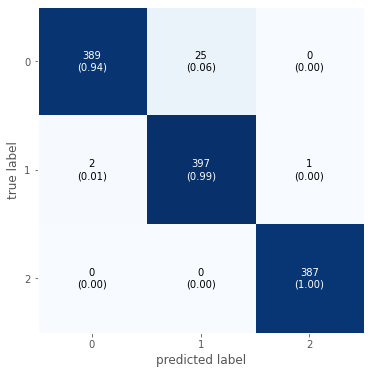

In [ ]:
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
        }

xgb_classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

xgb_classifier = GridSearchCV(xgb_classifier, params, refit = True, verbose = 3, n_jobs=-1)
xgb_classifier.fit(x_train,y_train)
print(xgb_classifier.best_params_)

pred_xgb = xgb_classifier.predict(x_test)
evaluator(y_test, pred_xgb)

###SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy is:  0.9750208159866778

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       414
         2.0       0.95      0.98      0.96       400
         3.0       0.99      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9815522241377601 


Confusion Matrix: 




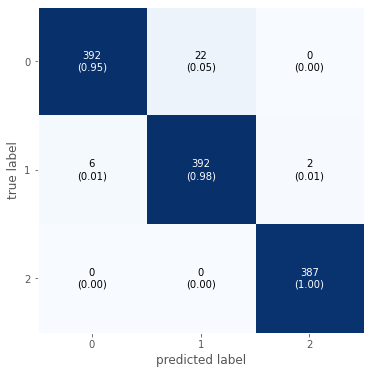

In [ ]:
from sklearn.svm import SVC

params = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}

svm_classifier = SVC(max_iter=5000)
svm_classifier = GridSearchCV(svm_classifier, params, refit = True, verbose = 3,n_jobs=-1)
svm_classifier.fit(x_train,y_train)

pred_svm = svm_classifier.predict(x_test)
evaluator(y_test, pred_svm)

###KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.3s finished


Accuracy is:  0.9800166527893422

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       414
         2.0       0.95      1.00      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.985347729485492 


Confusion Matrix: 




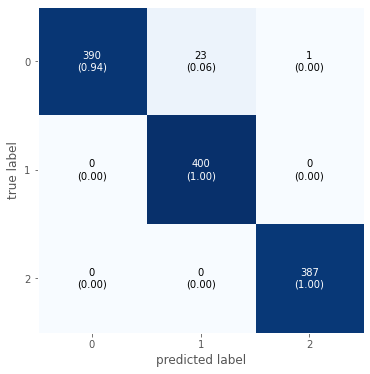

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params = dict(n_neighbors=range(1, 31))
knn_classifier = KNeighborsClassifier()
knn_classifier = GridSearchCV(knn_classifier, params, refit = True, verbose = 3,n_jobs=-1)
knn_classifier.fit(x_train,y_train)

pred_knn = knn_classifier.predict(x_test)
evaluator(y_test, pred_knn)

###LGBM

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.3s finished


Accuracy is:  0.9900083263946711

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.97      0.99       414
         2.0       0.97      1.00      0.99       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9926722032242306 


Confusion Matrix: 


{'boosting_type': 'gbdt', 'num_leaves': 31}


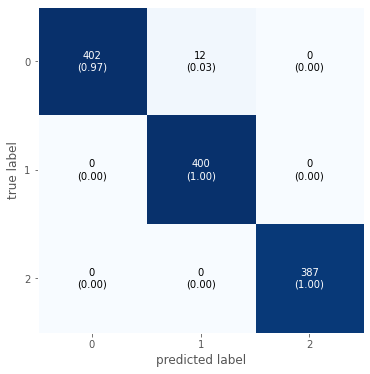

In [ ]:
from lightgbm import LGBMClassifier

params = {
    'num_leaves': [6,8,12,16,31], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    }

lgb_classifier = LGBMClassifier()
lgb_classifier = GridSearchCV(lgb_classifier, params, refit = True, verbose = 3,n_jobs=-1)
lgb_classifier.fit(x_train,y_train)
pred_lgb = lgb_classifier.predict(x_test)

evaluator(y_test,pred_lgb)
print(lgb_classifier.best_params_)

###Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


Accuracy is:  0.980849292256453

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       414
         2.0       0.95      0.99      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9859194729655716 


Confusion Matrix: 




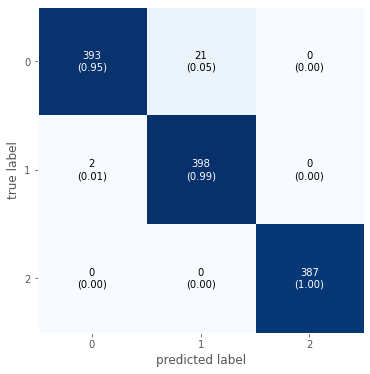

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 150, 250],
    'max_features': [0.5, 1.0],
    'min_samples_split': [2, 4, 6]
}


rf_classifier = RandomForestClassifier()
rf_classifier = GridSearchCV(rf_classifier, params, refit = True, verbose = 3,n_jobs=-1)

rf_classifier.fit(x_train,y_train)

pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)

### Voting

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.9s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


Accuracy is:  0.984179850124896

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       414
         2.0       0.95      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9883976551050319 


Confusion Matrix: 




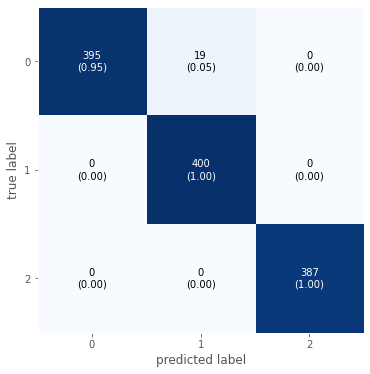

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [("xgb_classifier",xgb_classifier),("lgb_classifier",lgb_classifier),("rf_classifier",rf_classifier)],voting='soft')
vc.fit(x_train,y_train)

pred_vc = vc.predict(x_test)

evaluator(y_test, pred_vc)

# Experiments 1 - Without Pre-Processing Data

## Deep Learning

## Machine Learning

XGBoost

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   52.6s finished


{'min_child_weight': 1, 'subsample': 0.8}
Accuracy is:  0.9530075187969925

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       410
         2.0       0.87      0.81      0.83        72
         3.0       0.96      0.96      0.96        50

    accuracy                           0.95       532
   macro avg       0.93      0.91      0.92       532
weighted avg       0.95      0.95      0.95       532

AUC_ROC Score:  0.9341892737830065 


Confusion Matrix: 




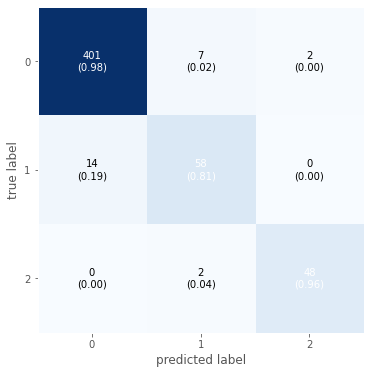

In [ ]:
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
        }

xgb_classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

xgb_classifier = GridSearchCV(xgb_classifier, params, refit = True, verbose = 3,n_jobs=-1)
xgb_classifier.fit(x_train,y_train)
print(xgb_classifier.best_params_)

pred_xgb = xgb_classifier.predict(x_test)
evaluator(y_test, pred_xgb)

Perbedaan accuracy dengan remove outliers + upsampling = 0,03

SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy is:  0.9210526315789473

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       410
         2.0       0.76      0.72      0.74        72
         3.0       0.91      0.82      0.86        50

    accuracy                           0.92       532
   macro avg       0.87      0.84      0.85       532
weighted avg       0.92      0.92      0.92       532

AUC_ROC Score:  0.8811842787357032 


Confusion Matrix: 




[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished


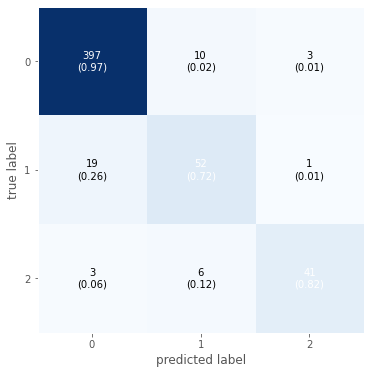

In [ ]:
from sklearn.svm import SVC

params = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}

svm_classifier = SVC(max_iter=5000)
svm_classifier = GridSearchCV(svm_classifier, params, refit = True, verbose = 3,n_jobs=-1)
svm_classifier.fit(x_train,y_train)

pred_svm = svm_classifier.predict(x_test)
evaluator(y_test, pred_svm)

Perbedaan accuracy dengan remove outliers + upsampling = 0.06

KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.9s


Accuracy is:  0.8947368421052632

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       410
         2.0       0.64      0.65      0.65        72
         3.0       0.83      0.78      0.80        50

    accuracy                           0.89       532
   macro avg       0.81      0.79      0.80       532
weighted avg       0.89      0.89      0.89       532

AUC_ROC Score:  0.8550916952694271 


Confusion Matrix: 




[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.2s finished


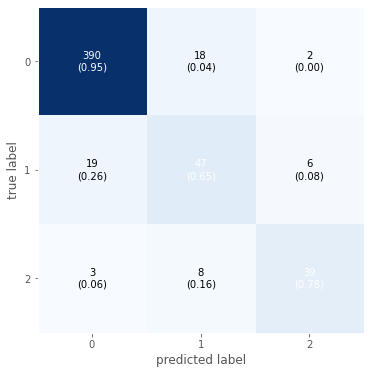

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params = dict(n_neighbors=range(1, 31))
knn_classifier = KNeighborsClassifier()
knn_classifier = GridSearchCV(knn_classifier, params, refit = True, verbose = 3,n_jobs=-1)
knn_classifier.fit(x_train,y_train)

pred_knn = knn_classifier.predict(x_test)
evaluator(y_test, pred_knn)

Perbedaan accuracy dengan remove outliers + upsampling = 0.09

LightGBM

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.5s finished


Accuracy is:  0.9548872180451128

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       410
         2.0       0.90      0.79      0.84        72
         3.0       0.92      0.94      0.93        50

    accuracy                           0.95       532
   macro avg       0.93      0.91      0.92       532
weighted avg       0.95      0.95      0.95       532

AUC_ROC Score:  0.9301560314194927 


Confusion Matrix: 


{'boosting_type': 'gbdt', 'num_leaves': 12}


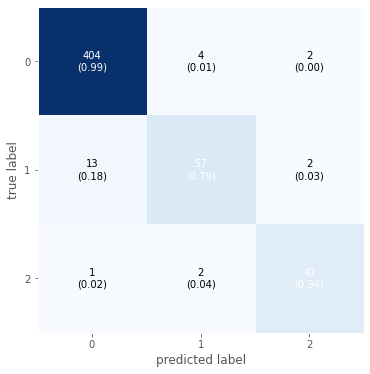

In [ ]:
from lightgbm import LGBMClassifier

params = {
    'num_leaves': [6,8,12,16,31], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    }

lgb_classifier = LGBMClassifier()
lgb_classifier = GridSearchCV(lgb_classifier, params, refit = True, verbose = 3,n_jobs=-1)
lgb_classifier.fit(x_train,y_train)
pred_lgb = lgb_classifier.predict(x_test)

evaluator(y_test,pred_lgb)
print(lgb_classifier.best_params_)

perbedaan accuracy dengan remove outliers + upsampling = 0.04

Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   49.1s finished


Accuracy is:  0.9454887218045113

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       410
         2.0       0.86      0.76      0.81        72
         3.0       0.96      0.92      0.94        50

    accuracy                           0.95       532
   macro avg       0.92      0.89      0.91       532
weighted avg       0.94      0.95      0.94       532

AUC_ROC Score:  0.9155201858626191 


Confusion Matrix: 




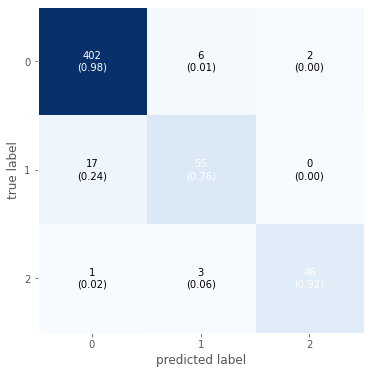

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 150, 250],
    'max_features': [0.5, 1.0],
    'min_samples_split': [2, 4, 6]
}


rf_classifier = RandomForestClassifier()
rf_classifier = GridSearchCV(rf_classifier, params, refit = True, verbose = 3,n_jobs=-1)

rf_classifier.fit(x_train,y_train)

pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)

perbedaan accuracy dengan remove outliers + upsampling = 0.03

# Experiments 2 - With Pre-Processing Data

## Outlier Removal

In [ ]:
# Function to set upper and lower bound to 3rd standard deviation and remove outliers

def removeOutlier(att, df2):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df2[(att > lowerbound) & (att < upperbound)]

    print((df2.shape[0] - df1.shape[0]), ' number of outliers from ', df2.shape[0] )
    print(' ******************************************************')
    
    df2 = df1.copy()

    return df2

Menghapus outliers dari kolom yang menunjukkan outliers di plot kotak yang divisualisasikan di atas

In [ ]:
df2_without_outlier = df2.copy()
df2_without_outlier = removeOutlier(df2_without_outlier.histogram_variance, df2_without_outlier)
df2_without_outlier = removeOutlier(df2_without_outlier.histogram_median, df2_without_outlier)
df2_without_outlier = removeOutlier(df2_without_outlier.histogram_mean, df2_without_outlier)
df2_without_outlier = removeOutlier(df2_without_outlier.histogram_mode, df2_without_outlier)
df2_without_outlier = removeOutlier(df2_without_outlier.percentage_of_time_with_abnormal_long_term_variability, df2_without_outlier)
df2_without_outlier = removeOutlier(df2_without_outlier.mean_value_of_short_term_variability, df2_without_outlier)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 ******************************************************
lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 ******************************************************
lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 ******************************************************
lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************
lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 ******************************************************
lowerbound:  -1.1711686306789288  -------- upperbound:  3.781908245673867
30  number of outliers from  1974
 ******************************************************


In [ ]:
df2_without_outlier.shape # dari yg awalnya 2126 baris -> 1944

(1944, 22)

## Fixing Multicollinearity

In [ ]:
df_vif = df2_without_outlier.drop("fetal_health", axis = 1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#nilai correlation >10 maka dia termasuk multicollinearity harus di hilangkan atau digabung tapi pada kasus ini dihilangkan
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [ ]:
#secara otomatis ReduceVIF drop kolom yang memiliki nilai correlation >10
Mult_Coll = ReduceVIF()
df4 = Mult_Coll.fit_transform(df_vif)
df4.head()

ReduceVIF fit
ReduceVIF transform
Dropping histogram_width with vif=inf


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping histogram_median with vif=4495.433922686206
Dropping histogram_mean with vif=1658.545617667895
Dropping baseline value with vif=886.1211045043835
Dropping histogram_mode with vif=359.267624937969
Dropping histogram_max with vif=98.51793338064233
Dropping histogram_min with vif=14.227527683540586


,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_variance,histogram_tendency
0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0,0.0,73.0,1.0
1,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,6.0,1.0,12.0,0.0
2,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,5.0,1.0,13.0,0.0
3,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,11.0,0.0,13.0,1.0
4,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,9.0,0.0,11.0,1.0


In [ ]:
# df_fetal = pd.concat([df4, df2_without_outlier["fetal_health"]], axis=1)
df_fetal = df2_without_outlier[df4.columns]
df_fetal['fetal_health'] = df2_without_outlier['fetal_health']
df_fetal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_variance,histogram_tendency,fetal_health
0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0,0.0,73.0,1.0,2.0
1,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,6.0,1.0,12.0,0.0,1.0
2,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,5.0,1.0,13.0,0.0,1.0
3,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,11.0,0.0,13.0,1.0,1.0
4,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,9.0,0.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,4.0,0.0,2.0,0.0,2.0
2122,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,6.0,0.0,3.0,1.0,2.0
2123,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,5.0,0.0,4.0,1.0,2.0
2124,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,6.0,0.0,4.0,1.0,2.0


## Balancing Dataset

In [ ]:
df_fetal.fetal_health.value_counts()

1.0    1601
2.0     283
3.0      60
Name: fetal_health, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df3_1 = df_fetal[df_fetal.fetal_health==1]
df3_2 = df_fetal[df_fetal.fetal_health==2]
df3_3 = df_fetal[df_fetal.fetal_health==3]
 
# Upsample minority class
df3_2_upsampled = resample(df3_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df3_3_upsampled = resample(df3_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_fetal_upsampled = pd.concat([df3_1, df3_2_upsampled, df3_3_upsampled])
 
# Display new class counts
df_fetal_upsampled.fetal_health.value_counts()

3.0    1601
2.0    1601
1.0    1601
Name: fetal_health, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate Target Classes
df3_1 = df2_without_outlier[df2_without_outlier.fetal_health==1]
df3_2 = df2_without_outlier[df2_without_outlier.fetal_health==2]
df3_3 = df2_without_outlier[df2_without_outlier.fetal_health==3]
 
# Upsample minority class
df3_2_upsampled = resample(df3_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df3_3_upsampled = resample(df3_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df2_without_outlier_upsampled = pd.concat([df3_1, df3_2_upsampled, df3_3_upsampled])
 
# Display new class counts
df2_without_outlier_upsampled.fetal_health.value_counts()

3.0    1601
2.0    1601
1.0    1601
Name: fetal_health, dtype: int64

## Preparing Data for Modelling

In [ ]:
# encoding target class into 0, 1, and 2
label_exp21 = LabelEncoder()
# label_exp21.fit(df_fetal['fetal_health'])
df_fetal_upsampled['fetal_health_encode'] = label_exp21.fit_transform(df_fetal_upsampled['fetal_health'])

# encoding target class into 0, 1, and 2
label_exp22 = LabelEncoder()
# label.fit(df_fetal_upsampled['fetal_health'])
df2['fetal_health_encode'] = label_exp22.fit_transform(df2['fetal_health'])

In [ ]:
# for experiments 2.1
x_exp21 = df_fetal_upsampled.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y_exp21 = df_fetal_upsampled['fetal_health_encode'] 
x_train_exp21, x_test_exp21, y_train_exp21, y_test_exp21 = train_test_split(x_exp21, y_exp21, test_size = 0.25, random_state = 0)

# for experiments 2.2
x_exp22 = df2.drop(columns= ['fetal_health', 'fetal_health_encode'], axis = 1)
y_exp22 = df2['fetal_health_encode'] 
x_train_exp22, x_test_exp22, y_train_exp22, y_test_exp22 = train_test_split(x_exp22, y_exp22, test_size = 0.25, random_state = 0)

data_train_exp21, data_train_exp22 = pd.concat((x_train_exp21, y_train_exp21), axis = 1), pd.concat((x_train_exp22, y_train_exp22), axis = 1)
data_test_exp21, data_test_exp22 = pd.concat((x_test_exp21, y_test_exp21), axis = 1), pd.concat((x_test_exp22, y_test_exp22), axis = 1)

In [ ]:
def prepareTimelags(data_input, data_output, n_timestep):
  # we need:
  # - what is the input?
  # - what is the output?
  # - how many training size?
  # - how many timestep?

  input, output = [] , []
  
  for i in range(n_timestep, len(data_input)):
      input.append(data_input[(i-n_timestep):i, : ])
      output.append(np.array(data_output)[i])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

In [ ]:
scaler_exp21 = StandardScaler()
scaler_exp22 = StandardScaler()

x_train_exp21_scaled = scaler_exp21.fit_transform(x_train_exp21)
x_test_exp21_scaled = scaler_exp21.transform(x_test_exp21)

x_train_exp22_scaled = scaler_exp22.fit_transform(x_train_exp22)
x_test_exp22_scaled = scaler_exp22.transform(x_test_exp22)

In [ ]:
# define inputs for data training
n_features_exp21 = len(x_exp21.columns)
n_features_exp22 = len(x_exp22.columns)

# creating time lags (in case: using data 7 days before to predict case on 7th days)
n_timestep = 300
train_input_exp21, train_output_exp21 = prepareTimelags(data_input= x_train_exp21_scaled, data_output = y_train_exp21, n_timestep= n_timestep)
train_input_exp22, train_output_exp22 = prepareTimelags(data_input= x_train_exp22_scaled, data_output = y_train_exp22, n_timestep= n_timestep)

# reshape into [ samples, timestep, how many features to predict]
train_input_exp21 = train_input_exp21.reshape((train_input_exp21.shape[0], train_input_exp21.shape[1], n_features_exp21))
train_input_exp22 = train_input_exp22.reshape((train_input_exp22.shape[0], train_input_exp22.shape[1], n_features_exp22))

In [ ]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
train_output_exp21 = np_utils.to_categorical(train_output_exp21)
train_output_exp22 = np_utils.to_categorical(train_output_exp22)

## Experiments 2.1 - Fixing Multicollinearity, Upsampling Data, and Outlier Removal

### Deep Learning

 ANN

In [ ]:
def build_ann_model(neurons= 21, activation = 'tanh', optimizer = 'adam'):
  # define model
  model = Sequential()
  model.add(Dense(neurons, activation= activation, input_shape=(14,)))
  # Adding the output layer
  model.add(Dense(units = 3))
  # compile the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# define parameter list
hiddenlayer_list = [x_train_exp21.shape[1] * 1, x_train_exp21.shape[1] * 2, x_train_exp21.shape[1] * 3]
optimizer_list = ['adam', 'rmsprop', 'sgd']
activation_list = ['relu', 'softsign', 'tanh']
batch_list = [32, 64, 96]

ann_param_grid = dict(neurons = hiddenlayer_list, optimizer= optimizer_list, batch_size= batch_list, activation = activation_list)
print('List of Parameter : \n{}'.format(lstm_param_grid))

List of Parameter : 
{'neurons': [14, 28, 42], 'optimizer': ['adam', 'rmsprop', 'sgd'], 'batch_size': [32, 64, 96], 'activation': ['relu', 'softsign', 'tanh']}


In [ ]:
# define model
ann_model = KerasClassifier(build_fn=build_ann_model, verbose=1)

# define k-fold
kfold = KFold(n_splits= 5, shuffle= True)
# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)
callback = dict(callbacks=[callback_model])

# define grid object
grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv= kfold)
# fit into data training
grid_result = grid.fit(x_train_exp21_scaled, y_train_exp21, **callback)
print('Build Completed.')

113/113 [==============================] - 0s 1ms/step - loss: 3.4273 - accuracy: 0.3867
Build Completed.


In [ ]:
# summarize results
grid_acc_score = np.round((grid_result.best_score_ * 100), 3)
print("Best: {0} % using {1}".format(grid_acc_score , grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
	# print("%f with: %r" % (mean, param))
  print('{0} % with: {1}'.format(np.round((mean * 100), 2), param))

Best: 54.963 % using {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'sgd'}
29.99 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'adam'}
40.09 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'rmsprop'}
54.96 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'sgd'}
35.62 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'adam'}
44.23 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'rmsprop'}
27.33 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'sgd'}
40.32 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'adam'}
45.67 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'rmsprop'}
44.6 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'sgd'}
26.96 % with: {'activation': 'relu', 'batch_size': 64, 'neurons': 14, 'optimize

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    labels = ['Normal', 'Suspected', 'Pathological']
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6), class_names=labels)

def evaluator2(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred, target_names= ['Normal', 'Suspect', 'Pathological']))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6))

38/38 [==============================] - 0s 835us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy is:  0.37385512073272276

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.23      0.02      0.04       414
     Suspect       0.74      0.21      0.33       400
Pathological       0.34      0.91      0.49       387

    accuracy                           0.37      1201
   macro avg       0.44      0.38      0.29      1201
weighted avg       0.43      0.37      0.28      1201

AUC_ROC Score:  0.5376216985408359 


Confusion Matrix: 




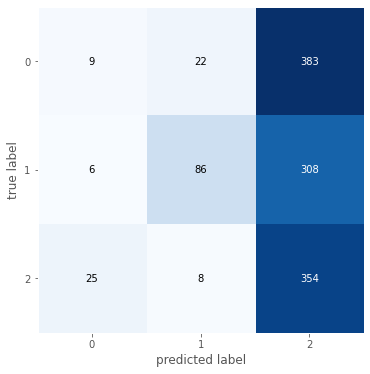

In [ ]:
model_pred = grid_result.predict(x_test_exp21)
evaluator2(y_test_exp21, model_pred)

LSTM

In [ ]:
def build_lstm_model(neurons= 21, activation = 'tanh', optimizer = 'adam'):
  # define model
  model = Sequential()
  model.add(LSTM(neurons, activation= activation, input_shape=(train_input.shape[1], train_input.shape[2])))
  # Adding the output layer
  model.add(Dense(units = 3))
  # compile the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# define parameter list
hiddenlayer_list = [x_train_exp21.shape[1] * 1, x_train_exp21.shape[1] * 2, x_train_exp21.shape[1] * 3]
optimizer_list = ['adam', 'rmsprop', 'sgd']
activation_list = ['relu', 'softsign', 'tanh']
batch_list = [32, 64, 96]

lstm_param_grid = dict(neurons = hiddenlayer_list, optimizer= optimizer_list, batch_size= batch_list, activation = activation_list)
print('List of Parameter : \n{}'.format(lstm_param_grid))

List of Parameter : 
{'neurons': [14, 28, 42], 'optimizer': ['adam', 'rmsprop', 'sgd'], 'batch_size': [32, 64, 96], 'activation': ['relu', 'softsign', 'tanh']}


In [ ]:
# define model
lstm_model = KerasClassifier(build_fn=build_lstm_model, verbose=1)

# define k-fold
kfold = KFold(n_splits= 5, shuffle= True)
# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)
callback = dict(callbacks=[callback_model])

# define grid object
grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv= kfold)
# fit into data training
grid_result = grid.fit(train_input_exp21, train_output_exp21, **callback)
print('Build Completed.')

104/104 [==============================] - 11s 100ms/step - loss: 5.3197 - accuracy: 0.3240
Build Completed.


On 300 Timestep

In [ ]:
# summarize results
grid_acc_score = np.round((grid_result.best_score_ * 100), 3)
print("Based on {0} timestep, best: {1} % using {2}".format(n_timestep, grid_acc_score , grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
	# print("%f with: %r" % (mean, param))
  print('{0} % with: {1}'.format(np.round((mean * 100), 2), param))

Based on 300 timestep, best: 35.465 % using {'activation': 'softsign', 'batch_size': 32, 'neurons': 14, 'optimizer': 'adam'}
33.22 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'adam'}
33.25 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'rmsprop'}
33.25 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 14, 'optimizer': 'sgd'}
34.19 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'adam'}
33.62 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'rmsprop'}
32.65 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 28, 'optimizer': 'sgd'}
32.31 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'adam'}
33.53 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'rmsprop'}
32.86 % with: {'activation': 'relu', 'batch_size': 32, 'neurons': 42, 'optimizer': 'sgd'}
32.5 % with: {'activation': 'relu', 'batch_size': 

In [ ]:
# define inputs for data testing
dataset_total = pd.concat((x_train_exp21, x_test_exp21), axis = 0)
dataset_test_input = dataset_total[len(dataset_total) - len(data_test_exp21) - n_timestep:].values
# dataset_test_input.shape
dataset_test_input = dataset_test_input.reshape(-1, 14) #Jadiin Matriks, Sebelumnya Vektor
dataset_test_input = scaler_exp21.transform(dataset_test_input)

test_input = []
for i in range(n_timestep, len(dataset_test_input)):
    test_input.append(dataset_test_input[i-n_timestep:i, : ])
test_input = np.array(test_input)
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 14))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    labels = ['Normal', 'Suspected', 'Pathological']
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6), class_names=labels)

def evaluator2(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred, target_names= ['Normal', 'Suspect', 'Pathological']))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6))

 7/38 [====>.........................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


38/38 [==============================] - 1s 16ms/step
Accuracy is:  0.33555370524562866

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.37      0.32      0.34       414
     Suspect       0.33      0.48      0.39       400
Pathological       0.30      0.20      0.24       387

    accuracy                           0.34      1201
   macro avg       0.33      0.33      0.33      1201
weighted avg       0.33      0.34      0.33      1201

AUC_ROC Score:  0.500828386458439 


Confusion Matrix: 




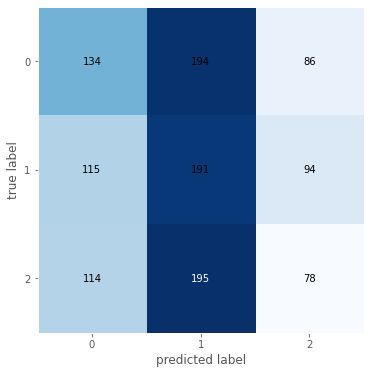

In [ ]:
model_pred = grid_result.predict(test_input)
evaluator2(y_test_exp21, model_pred)

### Maching Learning

XGBoost

SVM

KNN

Random Forest

## Experiments 2.2 - Without Pre-processing

### Deep Learning

 ANN

In [ ]:
def build_ann_model(neurons= 21, activation = 'tanh', optimizer = 'adam'):
  # define model
  model = Sequential()
  model.add(Dense(neurons, activation= activation, input_shape=(21,)))
  # Adding the output layer
  model.add(Dense(units = 3))
  # compile the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# define parameter list
hiddenlayer_list = [x_train_exp22.shape[1] * 1, x_train_exp22.shape[1] * 2, x_train_exp22.shape[1] * 3]
optimizer_list = ['adam', 'rmsprop', 'sgd']
activation_list = ['relu', 'softsign', 'tanh']
batch_list = [32, 64, 96]

ann_param_grid = dict(neurons = hiddenlayer_list, optimizer= optimizer_list, batch_size= batch_list, activation = activation_list)
print('List of Parameter : \n{}'.format(ann_param_grid))

List of Parameter : 
{'neurons': [21, 42, 63], 'optimizer': ['adam', 'rmsprop', 'sgd'], 'batch_size': [32, 64, 96], 'activation': ['relu', 'softsign', 'tanh']}


In [ ]:
# define model
ann_model = KerasClassifier(build_fn=build_ann_model, verbose=1)

# define k-fold
kfold = KFold(n_splits= 5, shuffle= True)
# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)
callback = dict(callbacks=[callback_model])

# define grid object
grid = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv= kfold)
# fit into data training
grid_result = grid.fit(x_train_exp22_scaled, y_train_exp22, **callback)
print('Build Completed.')

25/25 [==============================] - 0s 1ms/step - loss: 6.2945 - accuracy: 0.1764
Build Completed.


In [ ]:
# summarize results
grid_acc_score = np.round((grid_result.best_score_ * 100), 3)
print("Best: {0} % using {1}".format(grid_acc_score , grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
# for mean, param in zip(means, params):
# 	# print("%f with: %r" % (mean, param))
#   print('{0} % with: {1}'.format(np.round((mean * 100), 2), param))

Best: 45.798 % using {'activation': 'relu', 'batch_size': 64, 'neurons': 63, 'optimizer': 'adam'}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    labels = ['Normal', 'Suspected', 'Pathological']
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6), class_names=labels)

def evaluator2(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred, target_names= ['Normal', 'Suspect', 'Pathological']))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6))

9/9 [==============================] - 0s 1ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy is:  0.11278195488721804

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.79      0.04      0.07       410
     Suspect       0.12      0.54      0.20        72
Pathological       0.03      0.12      0.05        50

    accuracy                           0.11       532
   macro avg       0.31      0.23      0.11       532
weighted avg       0.63      0.11      0.09       532

AUC_ROC Score:  0.4445208163852947 


Confusion Matrix: 




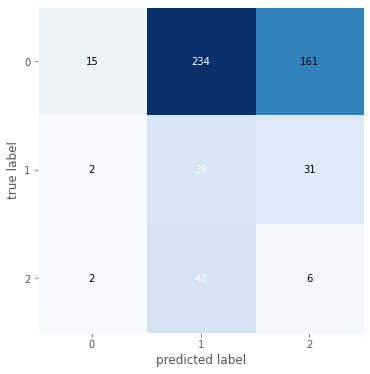

In [ ]:
model_pred = grid_result.predict(x_test_exp22_scaled)
evaluator2(y_test_exp22, model_pred)

LSTM

In [ ]:
def build_lstm_model(neurons= 21, activation = 'tanh', optimizer = 'adam'):
  # define model
  model = Sequential()
  model.add(LSTM(neurons, activation= activation, input_shape=(train_input_exp22.shape[1], train_input_exp22.shape[2])))
  # Adding the output layer
  model.add(Dense(units = 3))
  # compile the model
  model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# define parameter list
hiddenlayer_list = [x_train_exp22.shape[1] * 1, x_train_exp22.shape[1] * 2, x_train_exp22.shape[1] * 3]
optimizer_list = ['adam', 'rmsprop', 'sgd']
activation_list = ['relu', 'softsign', 'tanh']
batch_list = [32, 64, 96]

lstm_param_grid = dict(neurons = hiddenlayer_list, optimizer= optimizer_list, batch_size= batch_list, activation = activation_list)
print('List of Parameter : \n{}'.format(lstm_param_grid))

List of Parameter : 
{'neurons': [21, 42, 63], 'optimizer': ['adam', 'rmsprop', 'sgd'], 'batch_size': [32, 64, 96], 'activation': ['relu', 'softsign', 'tanh']}


In [ ]:
# define model
lstm_model = KerasClassifier(build_fn=build_lstm_model, verbose=1)

# define k-fold
kfold = KFold(n_splits= 5, shuffle= True)
# callback to stop the training if no improvement in 5 consecutive epoch
callback_model = EarlyStopping(monitor= 'loss', patience= 5)
callback = dict(callbacks=[callback_model])

# define grid object
grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv= kfold)
# fit into data training
grid_result = grid.fit(train_input_exp22, train_output_exp22, **callback)
print('Build Completed.')

41/41 [==============================] - 7s 133ms/step - loss: 2.6058 - accuracy: 0.1002
Build Completed.


In [ ]:
# summarize results
grid_acc_score = np.round((grid_result.best_score_ * 100), 3)
print("Based on {0} timestep, best: {1} % using {2}".format(n_timestep, grid_acc_score , grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
# for mean, param in zip(means, params):
# 	# print("%f with: %r" % (mean, param))
#   print('{0} % with: {1}'.format(np.round((mean * 100), 2), param))

Based on 300 timestep, best: 77.435 % using {'activation': 'softsign', 'batch_size': 32, 'neurons': 42, 'optimizer': 'sgd'}


In [ ]:
# define inputs for data testing
dataset_total = pd.concat((x_train_exp22, x_test_exp22), axis = 0)
dataset_test_input = dataset_total[len(dataset_total) - len(data_test_exp22) - n_timestep:].values
dataset_test_input = dataset_test_input.reshape(-1, 21) #Jadiin Matriks, Sebelumnya Vektor
dataset_test_input = scaler_exp22.transform(dataset_test_input)

test_input = []
for i in range(n_timestep, len(dataset_test_input)):
    test_input.append(dataset_test_input[i-n_timestep:i, : ])
test_input = np.array(test_input)
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 21))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    labels = ['Normal', 'Suspected', 'Pathological']
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6), class_names=labels)

def evaluator2(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred, target_names= ['Normal', 'Suspect', 'Pathological']))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm, figsize=(8,6))

 5/17 [=======>......................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


17/17 [==============================] - 0s 27ms/step
Accuracy is:  0.09398496240601503

Classification Report: 
               precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       410
     Suspect       0.00      0.00      0.00        72
Pathological       0.09      1.00      0.17        50

    accuracy                           0.09       532
   macro avg       0.03      0.33      0.06       532
weighted avg       0.01      0.09      0.02       532

AUC_ROC Score:  0.5 


Confusion Matrix: 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


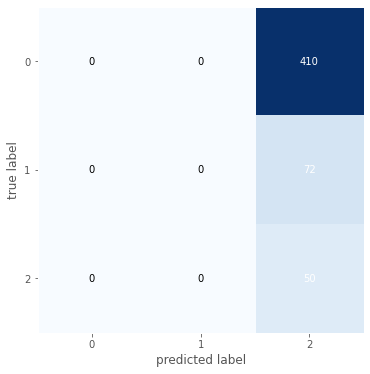

In [ ]:
model_pred = grid_result.predict(test_input)
evaluator2(y_test_exp22, model_pred)

### Maching Learning

XGBoost

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.4min finished


{'min_child_weight': 1, 'subsample': 0.6}
Accuracy is:  0.9766860949208993

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       414
         2.0       0.94      0.99      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9828554571688984 


Confusion Matrix: 




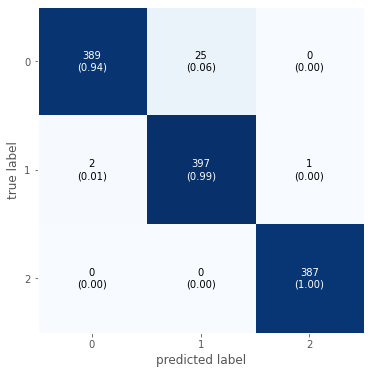

In [ ]:
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
        }

xgb_classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

xgb_classifier = GridSearchCV(xgb_classifier, params, refit = True, verbose = 3,n_jobs=-1)
xgb_classifier.fit(x_train,y_train)
print(xgb_classifier.best_params_)

pred_xgb = xgb_classifier.predict(x_test)
evaluator(y_test, pred_xgb)

SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy is:  0.9750208159866778

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       414
         2.0       0.95      0.98      0.96       400
         3.0       0.99      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9815522241377601 


Confusion Matrix: 




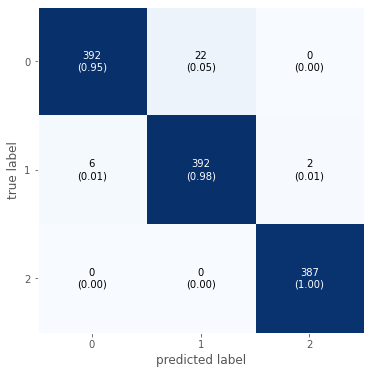

In [ ]:
from sklearn.svm import SVC

params = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}

svm_classifier = SVC(max_iter=5000)
svm_classifier = GridSearchCV(svm_classifier, params, refit = True, verbose = 3,n_jobs=-1)
svm_classifier.fit(x_train,y_train)

pred_svm = svm_classifier.predict(x_test)
evaluator(y_test, pred_svm)

KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.3s finished


Accuracy is:  0.9800166527893422

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       414
         2.0       0.95      1.00      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.985347729485492 


Confusion Matrix: 




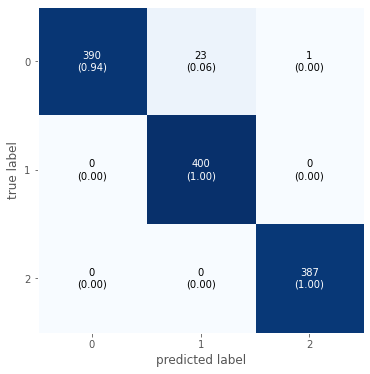

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params = dict(n_neighbors=range(1, 31))
knn_classifier = KNeighborsClassifier()
knn_classifier = GridSearchCV(knn_classifier, params, refit = True, verbose = 3,n_jobs=-1)
knn_classifier.fit(x_train,y_train)

pred_knn = knn_classifier.predict(x_test)
evaluator(y_test, pred_knn)

LightGBM

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.3s finished


Accuracy is:  0.9900083263946711

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.97      0.99       414
         2.0       0.97      1.00      0.99       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9926722032242306 


Confusion Matrix: 


{'boosting_type': 'gbdt', 'num_leaves': 31}


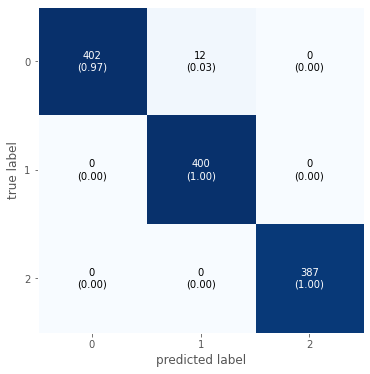

In [ ]:
from lightgbm import LGBMClassifier

params = {
    'num_leaves': [6,8,12,16,31], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    }

lgb_classifier = LGBMClassifier()
lgb_classifier = GridSearchCV(lgb_classifier, params, refit = True, verbose = 3,n_jobs=-1)
lgb_classifier.fit(x_train,y_train)
pred_lgb = lgb_classifier.predict(x_test)

evaluator(y_test,pred_lgb)
print(lgb_classifier.best_params_)

Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


Accuracy is:  0.980849292256453

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       414
         2.0       0.95      0.99      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9859194729655716 


Confusion Matrix: 




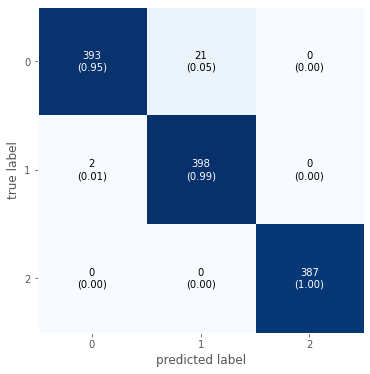

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 150, 250],
    'max_features': [0.5, 1.0],
    'min_samples_split': [2, 4, 6]
}


rf_classifier = RandomForestClassifier()
rf_classifier = GridSearchCV(rf_classifier, params, refit = True, verbose = 3,n_jobs=-1)

rf_classifier.fit(x_train,y_train)

pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)